In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

#암을 이진 분석하기 위해서 만든 프로그램
cancer = load_breast_cancer()
print("cancer.keys(): \n {}".format(cancer.keys()))

print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

print("클래스별 샘플 개수: \n{}".format({n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}))

print("특성 이름 : \n{}".format(cancer.feature_names))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    #훈련 세트 정확도 지정
    training_accuracy.append(clf.score(X_train, y_train))
    
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings,test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

mglearn.plots.plot_knn_regression(n_neighbors=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태 : (569, 30)
클래스별 샘플 개수: 
{'malignant': 212, 'benign': 357}
특성 이름 : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [2]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train,y_train)
print("훈련 세트 점수 : {:.3}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3}".format((logreg.score(X_test,y_test))))

훈련 세트 점수 : 0.955
테스트 세트 점수 : 0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [3]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("훈련 세트 점수 : {:.3}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3}".format((logreg100.score(X_test,y_test))))

훈련 세트 점수 : 0.972
테스트 세트 점수 : 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("훈련 세트 점수 : {:.3}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3}".format((logreg001.score(X_test,y_test))))

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.93


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


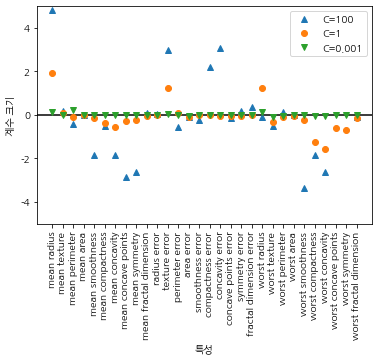

In [5]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

In [6]:
for C, marker in zip([0.001, 1, 100], ['o','^', 'v']):
    lr_11 = LogisticRegression(C=C, penalty="l1").fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(
        C, lr_11.score(X_train,y_train)
    ))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(
        C, lr_11.score(X_test,y_test)
    ))
    plt.plot(lr_11.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [8]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train,y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)



In [10]:
import graphviz

with open("tree.dot")as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 144: illegal multibyte sequence